# Data Preprocessing

In this file, we will :

- Load the three datasets (`train`, `test`, `evaluate`)
- Process them :
  - Resize and format the images
  - Apply the masks on the images
- Save the resulting numpy arrays in npz files


In [1]:
from datasets import load_dataset

train_dataset = load_dataset("Az-r-ow/chest_xray", split="train")
test_dataset = load_dataset("Az-r-ow/chest_xray", split="test")
eval_dataset = load_dataset("Az-r-ow/chest_xray", split="validation")

In [2]:
from utils.helpers import format_dataset

train_labels = train_dataset.features["label"].names
test_labels = test_dataset.features["label"].names
eval_labels = eval_dataset.features["label"].names

train_dataset = format_dataset(train_dataset, train_labels)
test_dataset = format_dataset(test_dataset, test_labels)
eval_dataset = format_dataset(eval_dataset, eval_labels)

In the following function, the images will be :

- Resized to `(224, 224)`
- Converted to **grayscale**
- Masked based on [the image mask](./image_mask.ipynb)
- Converted to `np.array`

The reason why we chose $(224, 224)$ for the images because according to *Simonyan, K., & Zisserman, A. (2014)* "To obtain a fixed-size input, the images were rescaled so that the shorter side was of length 256, and then a 224x224 crop was taken from the resulting image. This preprocessing is common practice in training convolutional networks and is used, for example, by Krizhevsky et al. (2012)."[[1]](#1). Except, that we will only be resizing the image and not cropping it. 


In [3]:
import numpy as np


def preprocess(img, mask, size=(224, 224)):
    img = img.resize(size)
    img = img.convert("L")
    img = np.array(img)
    return img * mask

In [6]:
from utils.helpers import generate_mask

mask = generate_mask((224, 224))

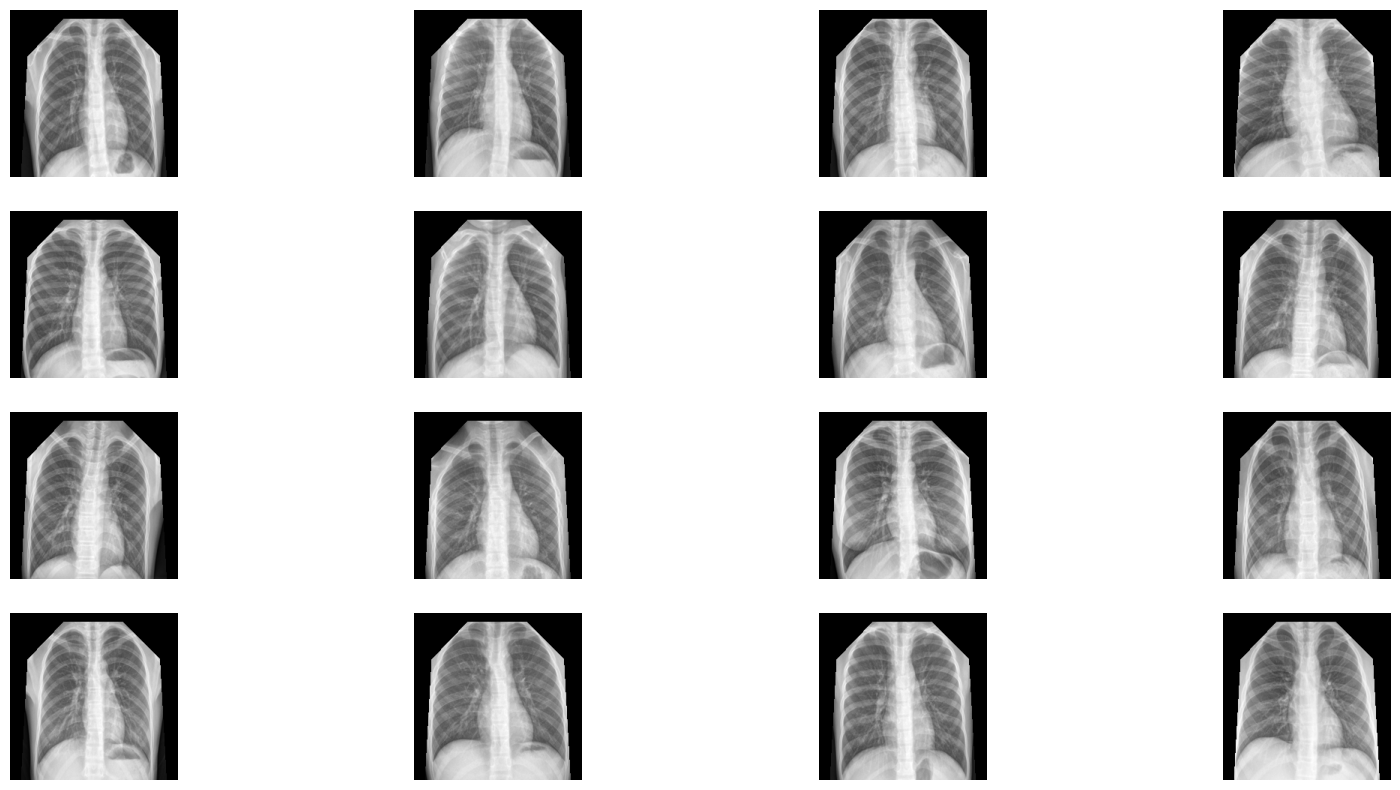

In [7]:
from utils.helpers import display_images

x_test = test_dataset["image"].map(lambda x: preprocess(x, mask)).reset_index(drop=True)

display_images(x_test, 4, 4)

In [8]:
x_train = (
    train_dataset["image"].map(lambda x: preprocess(x, mask)).reset_index(drop=True)
)
x_eval = eval_dataset["image"].map(lambda x: preprocess(x, mask)).reset_index(drop=True)

In [9]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_eval = x_eval.to_numpy()

y_train = train_dataset["label"].to_numpy()
y_test = test_dataset["label"].to_numpy()
y_eval = eval_dataset["label"].to_numpy()

np.savez(
    "../datasets/processed_data",
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    x_eval=x_eval,
    y_eval=y_eval,
)

## References

<a id="1">[1]</a>
Simonyan, K., & Zisserman, A. (2014). Very Deep Convolutional Networks for Large-Scale Image Recognition. *arXiv preprint arXiv:1409.1556*. Available at: [https://arxiv.org/pdf/1409.1556.pdf](https://arxiv.org/pdf/1409.1556.pdf)